In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("MNIST_data", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [7]:
len(mnist.train.images)

55000

In [8]:
len(mnist.test.images)

10000

In [9]:
im_temp = mnist.train.images[0]

In [10]:
from skimage import io
import numpy as np

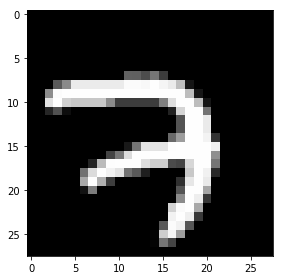

In [12]:
io.imshow(np.reshape(im_temp, (28,28)))

In [13]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

# Making the neural network
* The training images of MNIST lives on an vector space of dimension 784
* The dataset can be thought of as 55000 rows and 784 columns.
* Everything on this dataset is a real number between 0 and 1

y = softmax(W * x + b)

In [14]:
dim_input = 784
n_categories = 10

In [15]:
x = tf.placeholder(tf.float32, [None, dim_input])

In [16]:
W = tf.Variable(tf.zeros([dim_input,n_categories])) 
b = tf.Variable(tf.zeros([n_categories]))

In [17]:
softmax_args = tf.matmul(x, W) + b
y_hat = tf.nn.softmax(softmax_args)

# Training the neural network
* Loss / Cost <- objective to minimize the losses

In [18]:
from IPython.display import display, Math, Latex

In [19]:
display(Math(r"H_{y}(\hat{y}) = -\sum_{i} y_i log(\hat{y_i})"))

<IPython.core.display.Math object>

In [20]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [21]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_hat), reduction_indices=[1]))

In [22]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [23]:
session = tf.InteractiveSession()

In [24]:
tf.global_variables_initializer().run()

In [25]:
for _ in range(10000):
    batch_x, batch_y = mnist.train.next_batch(150)
    session.run(train_step, feed_dict={x:batch_x, y_: batch_y})

# Testing the neural network

In [26]:
correct_predictions = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y_,1))

In [27]:
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [28]:
print(session.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9251
